# Desenvolvimento do modelo de Machine Learning

#### Importando bibliotecas necessárias

In [122]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
pd.set_option('display.max_columns', None)
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_predict, KFold


In [92]:
data = pd.read_csv('hehe.csv')

In [93]:
data.describe()


,Unnamed: 0,AREA,ROOMS_NO,BATH_NO,PARKING_SPOTS,DETAIL_Academia,DETAIL_Ar condicionado,DETAIL_Armários na cozinha,DETAIL_Armários no quarto,DETAIL_Churrasqueira,DETAIL_Mobiliado,DETAIL_Piscina,DETAIL_Varanda,DETAIL_Área de serviço,REGION_pampulha,REGION_venda_nova,REGION_zona_centro_sul,REGION_zona_leste,REGION_zona_nordeste,REGION_zona_noroeste,REGION_zona_norte,REGION_zona_oeste,UTILS,PRICE
count,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,19875.000000,1.987500e+04
mean,9937.981484,102.910742,2.763321,2.035069,1.749031,0.113308,0.053937,0.069786,0.021283,0.219774,0.024956,0.163119,0.213585,0.324226,0.115975,0.116377,0.118390,0.120906,0.118289,0.119899,0.094692,0.116981,329.617560,6.595928e+05
std,5737.594114,58.577483,0.753198,0.975357,0.872701,0.316977,0.225899,0.254793,0.144330,0.414104,0.155995,0.369484,0.409847,0.468097,0.320203,0.320685,0.323077,0.326026,0.322959,0.324852,0.292796,0.321406,331.719003,5.705507e+05
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00
25%,4969.500000,62.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.200000e+05
50%,9938.000000,85.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,281.000000,4.980000e+05
75%,14906.500000,130.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,518.000000,7.900000e+05
max,19875.000000,500.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1774.000000,1.052800e+07


In [94]:
data = data[data['PRICE'] <= 2000000]

In [95]:
# Filtrando os registros onde AREA é 0 ou PRICE é 1
questionable_data = data[(data['AREA'] == 0) | (data['PRICE'] == 1)]

questionable_data[['AREA', 'PRICE']]

,AREA,PRICE
201,0,90000.0
2261,0,240000.0
4163,0,165000.0
16067,0,76000.0
16145,70,1.0


In [96]:
# Filtrando os registros onde BATH_NO é 0
bath_zero_data = data[data['BATH_NO'] == 0]

bath_zero_data[['AREA', 'ROOMS_NO', 'BATH_NO', 'PRICE']]


,AREA,ROOMS_NO,BATH_NO,PRICE
2261,0,3,0,240000.0
15901,140,2,0,320000.0


In [97]:
# Índices combinados dos registros questionáveis
combined_indices = set(questionable_data.index).union(set(bath_zero_data.index))

# Removendo os registros questionáveis
data_cleaned = data.drop(index=combined_indices)

# Verificando o tamanho do novo dataset
data_cleaned.shape


(19293, 24)

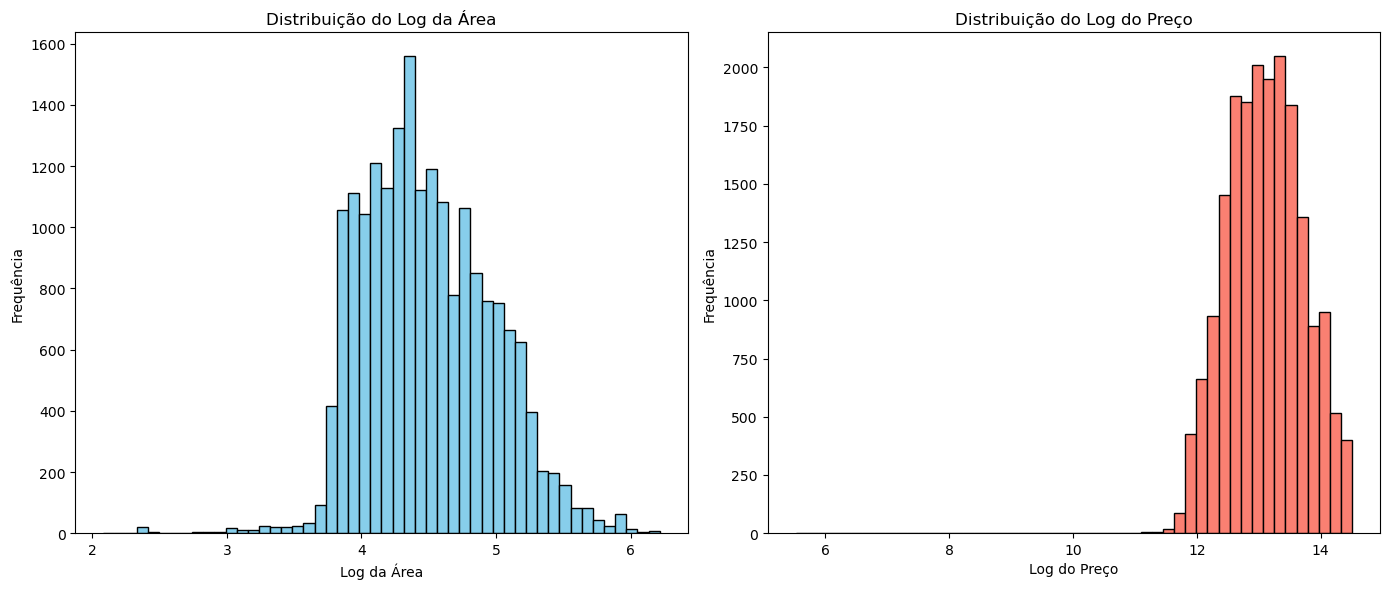

In [98]:
# Aplicando transformação logarítmica nas variáveis 'AREA' e 'PRICE'
data_cleaned['LOG_AREA'] = np.log1p(data_cleaned['AREA'])
data_cleaned['LOG_PRICE'] = np.log1p(data_cleaned['PRICE'])

# Plotando a distribuição das variáveis transformadas
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].hist(data_cleaned['LOG_AREA'], bins=50, color='skyblue', edgecolor='black')
ax[0].set_title('Distribuição do Log da Área')
ax[0].set_xlabel('Log da Área')
ax[0].set_ylabel('Frequência')

ax[1].hist(data_cleaned['LOG_PRICE'], bins=50, color='salmon', edgecolor='black')
ax[1].set_title('Distribuição do Log do Preço')
ax[1].set_xlabel('Log do Preço')
ax[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()


In [99]:
# Calculando a correlação das variáveis com 'LOG_PRICE'
correlation = data_cleaned.corr()['LOG_PRICE'].sort_values(ascending=False)

correlation


LOG_PRICE                     1.000000
PRICE                         0.925331
PARKING_SPOTS                 0.691581
LOG_AREA                      0.686410
BATH_NO                       0.664081
AREA                          0.628893
ROOMS_NO                      0.572914
REGION_zona_centro_sul        0.303799
DETAIL_Varanda                0.266255
DETAIL_Piscina                0.249482
DETAIL_Academia               0.231217
DETAIL_Churrasqueira          0.217742
DETAIL_Ar condicionado        0.194212
UTILS                         0.190289
REGION_zona_oeste             0.149923
DETAIL_Área de serviço        0.126799
REGION_zona_leste             0.086994
REGION_pampulha               0.069327
REGION_zona_nordeste          0.067190
Unnamed: 0                    0.055552
DETAIL_Mobiliado              0.033073
DETAIL_Armários no quarto    -0.030418
DETAIL_Armários na cozinha   -0.074460
REGION_zona_noroeste         -0.108332
REGION_zona_norte            -0.176802
REGION_venda_nova        

In [100]:
# Definindo as variáveis independentes e a variável dependente
X = data_cleaned.drop(columns=['PRICE', 'LOG_PRICE'])
y = data_cleaned['LOG_PRICE']

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((15434, 24), (3859, 24))

In [101]:
# Identificando as colunas de região
region_cols = [col for col in X_train.columns if 'REGION_' in col]

# Calculando o preço médio por metro quadrado para cada região no conjunto de treinamento
region_price_per_sqmt = {}

for region in region_cols:
    # Identificando os índices dos registros dessa região
    region_indices = X_train[X_train[region] == 1].index
    # Calculando o preço médio por metro quadrado
    avg_price_per_sqmt = y_train.loc[region_indices].sum() / X_train.loc[region_indices, 'AREA'].sum()
    region_price_per_sqmt[region] = avg_price_per_sqmt

# Mapeando os valores médios para os registros nos conjuntos de treinamento e teste
def map_avg_price_per_sqmt(row):
    for region, avg_price in region_price_per_sqmt.items():
        if row[region] == 1:
            return avg_price
    return np.nan

X_train['AVG_PRICE_PER_SQMT_BY_REGION'] = X_train.apply(map_avg_price_per_sqmt, axis=1)
X_test['AVG_PRICE_PER_SQMT_BY_REGION'] = X_test.apply(map_avg_price_per_sqmt, axis=1)

X_train.head()


,Unnamed: 0,AREA,ROOMS_NO,BATH_NO,PARKING_SPOTS,DETAIL_Academia,DETAIL_Ar condicionado,DETAIL_Armários na cozinha,DETAIL_Armários no quarto,DETAIL_Churrasqueira,DETAIL_Mobiliado,DETAIL_Piscina,DETAIL_Varanda,DETAIL_Área de serviço,REGION_pampulha,REGION_venda_nova,REGION_zona_centro_sul,REGION_zona_leste,REGION_zona_nordeste,REGION_zona_noroeste,REGION_zona_norte,REGION_zona_oeste,UTILS,LOG_AREA,AVG_PRICE_PER_SQMT_BY_REGION
17673,17674,64,2,2,2,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,1,630,4.174387,0.120728
4106,4107,95,3,1,2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,4.564348,0.165658
12231,12232,84,3,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,539,4.442651,0.119590
10120,10121,77,3,2,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,10,4.356709,0.134814
17091,17092,116,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4.762174,0.142253


In [102]:
# Calculando o preço médio por metro quadrado geral no conjunto de treinamento
general_avg_price_per_sqmt = y_train.sum() / X_train['AREA'].sum()

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)


# Substituindo NaNs pelo preço médio geral
X_train['AVG_PRICE_PER_SQMT_BY_REGION'].fillna(general_avg_price_per_sqmt, inplace=True)
X_test['AVG_PRICE_PER_SQMT_BY_REGION'].fillna(general_avg_price_per_sqmt, inplace=True)

# Treinando o modelo novamente
rf_regressor.fit(X_train, y_train)

# Fazendo previsões
y_pred = rf_regressor.predict(X_test)



# Avaliando o desempenho do modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

rmse, mae, r2


(0.30298651510340496, 0.1812365710582715, 0.7697769396025436)

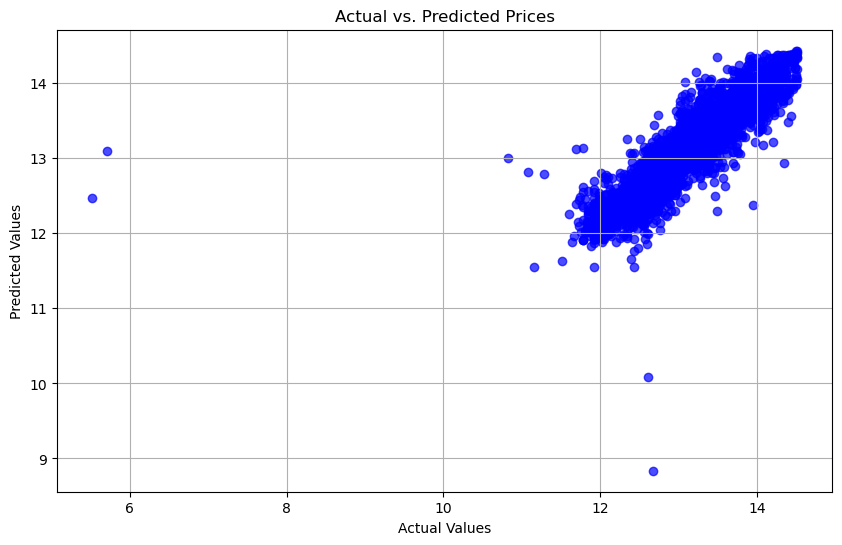

In [103]:
import matplotlib.pyplot as plt

# Assuming y_test contains the actual values and y_pred contains the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Prices')
plt.grid(True)
plt.show()


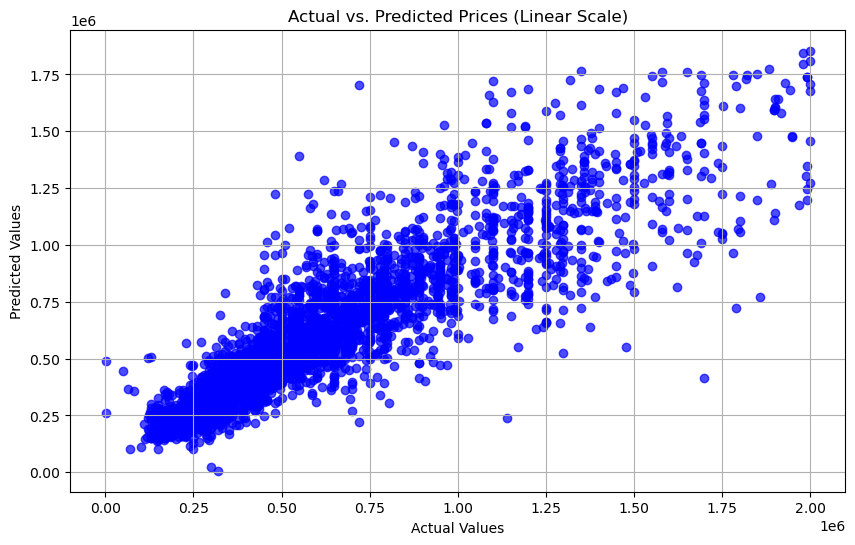

In [104]:
# Assuming y_test contains the actual values (in log scale) and y_pred contains the predicted values (in log scale)
actual_values_linear = np.exp(y_test)
predicted_values_linear = np.exp(y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(actual_values_linear, predicted_values_linear, color='blue', alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Prices (Linear Scale)')
plt.grid(True)
plt.show()


In [105]:
best_params = [142, 18, 3, 2]

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from skopt import dummy_minimize
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a function to optimize
def optimize_rf(params):
    n_estimators, max_depth, min_samples_split, min_samples_leaf = params
    
    rf_regressor = RandomForestRegressor(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth) if max_depth is not None else None,
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=42
    )
    
    rf_regressor.fit(X_train, y_train)
    y_pred = rf_regressor.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    return mae

# Define the parameter search space
param_space = [
    (50, 150),      # n_estimators
    (1, 20),        # max_depth
    (2, 10),        # min_samples_split
    (1, 4)          # min_samples_leaf
]

# Perform the optimization
result = dummy_minimize(optimize_rf, param_space, n_calls=50, random_state=42)

# Get the best parameters
best_params = result.x

# Create the best regressor
best_regressor = RandomForestRegressor(
    n_estimators=int(best_params[0]),
    max_depth=int(best_params[1]) if best_params[1] is not None else None,
    min_samples_split=int(best_params[2]),
    min_samples_leaf=int(best_params[3]),
    random_state=42
)

# Fit the best regressor to your data
best_regressor.fit(X_train, y_train)

# Make predictions using the best regressor
y_pred = best_regressor.predict(X_test)

# Evaluate the model's performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

best_params, rmse, mae, r2


In [106]:
# Create the best regressor
best_regressor = RandomForestRegressor(
    n_estimators=int(best_params[0]),
    max_depth=int(best_params[1]) if best_params[1] is not None else None,
    min_samples_split=int(best_params[2]),
    min_samples_leaf=int(best_params[3]),
    random_state=42
)

# Fit the best regressor to your data
best_regressor.fit(X_train, y_train)

# Make predictions using the best regressor
y_pred = best_regressor.predict(X_test)

# Evaluate the model's performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

best_params, rmse, mae, r2


([142, 18, 3, 2], 0.2960439856630886, 0.18198154802072722, 0.7802065692920227)

In [107]:
best_params = [142, 18, 3, 2]

## Tentando mais engenharia de dados

In [108]:
X_train.head()

,Unnamed: 0,AREA,ROOMS_NO,BATH_NO,PARKING_SPOTS,DETAIL_Academia,DETAIL_Ar condicionado,DETAIL_Armários na cozinha,DETAIL_Armários no quarto,DETAIL_Churrasqueira,DETAIL_Mobiliado,DETAIL_Piscina,DETAIL_Varanda,DETAIL_Área de serviço,REGION_pampulha,REGION_venda_nova,REGION_zona_centro_sul,REGION_zona_leste,REGION_zona_nordeste,REGION_zona_noroeste,REGION_zona_norte,REGION_zona_oeste,UTILS,LOG_AREA,AVG_PRICE_PER_SQMT_BY_REGION
17673,17674,64,2,2,2,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,1,630,4.174387,0.120728
4106,4107,95,3,1,2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,4.564348,0.165658
12231,12232,84,3,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,539,4.442651,0.119590
10120,10121,77,3,2,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,10,4.356709,0.134814
17091,17092,116,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4.762174,0.142253


In [109]:
import pandas as pd

# Supondo que X_train e X_test sejam seus DataFrames
# Primeiro, verifique se essas colunas existem no DataFrame
columns_to_drop = ["AREA", "Unnamed: 0"]

# Remover as colunas dos DataFrames X_train e X_test
X_train.drop(columns=columns_to_drop, inplace=True, errors='ignore')
X_test.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Agora, X_train e X_test não possuem mais as colunas "AREA" e "unnamed = 0"


In [110]:
X_train.head()

,ROOMS_NO,BATH_NO,PARKING_SPOTS,DETAIL_Academia,DETAIL_Ar condicionado,DETAIL_Armários na cozinha,DETAIL_Armários no quarto,DETAIL_Churrasqueira,DETAIL_Mobiliado,DETAIL_Piscina,DETAIL_Varanda,DETAIL_Área de serviço,REGION_pampulha,REGION_venda_nova,REGION_zona_centro_sul,REGION_zona_leste,REGION_zona_nordeste,REGION_zona_noroeste,REGION_zona_norte,REGION_zona_oeste,UTILS,LOG_AREA,AVG_PRICE_PER_SQMT_BY_REGION
17673,2,2,2,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,1,630,4.174387,0.120728
4106,3,1,2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,4.564348,0.165658
12231,3,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,539,4.442651,0.119590
10120,3,2,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,10,4.356709,0.134814
17091,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4.762174,0.142253


In [111]:


# Verifique se há valores na coluna "UTILS" que são iguais a 0
count_zeros = (X_train["UTILS"] == 0).sum()

# Exiba a contagem de zeros na coluna "UTILS"
print(f"Quantidade de valores iguais a 0 na coluna 'UTILS': {count_zeros}")


Quantidade de valores iguais a 0 na coluna 'UTILS': 3610


In [112]:
# Verifique se há valores na coluna "UTILS" que são iguais a 0
count_zeros = (X_test["UTILS"] == 0).sum()

# Exiba a contagem de zeros na coluna "UTILS"
print(f"Quantidade de valores iguais a 0 na coluna 'UTILS': {count_zeros}")


Quantidade de valores iguais a 0 na coluna 'UTILS': 915


In [113]:

# Criar uma instância do SimpleImputer com estratégia de preenchimento 'median'
imputer = SimpleImputer(strategy='median')

# Fit e transform no X_train apenas na coluna "UTILS"
X_train["UTILS"] = imputer.fit_transform(X_train[["UTILS"]])

# Transform no X_test apenas na coluna "UTILS" usando as estatísticas do X_train
X_test["UTILS"] = imputer.transform(X_test[["UTILS"]])


In [114]:
X_train.head()

,ROOMS_NO,BATH_NO,PARKING_SPOTS,DETAIL_Academia,DETAIL_Ar condicionado,DETAIL_Armários na cozinha,DETAIL_Armários no quarto,DETAIL_Churrasqueira,DETAIL_Mobiliado,DETAIL_Piscina,DETAIL_Varanda,DETAIL_Área de serviço,REGION_pampulha,REGION_venda_nova,REGION_zona_centro_sul,REGION_zona_leste,REGION_zona_nordeste,REGION_zona_noroeste,REGION_zona_norte,REGION_zona_oeste,UTILS,LOG_AREA,AVG_PRICE_PER_SQMT_BY_REGION
17673,2,2,2,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,1,630.0,4.174387,0.120728
4106,3,1,2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0.0,4.564348,0.165658
12231,3,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,539.0,4.442651,0.119590
10120,3,2,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,10.0,4.356709,0.134814
17091,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,4.762174,0.142253


In [115]:
# Create the best regressor
best_regressor = RandomForestRegressor(
    n_estimators=int(best_params[0]),
    max_depth=int(best_params[1]) if best_params[1] is not None else None,
    min_samples_split=int(best_params[2]),
    min_samples_leaf=int(best_params[3]),
    random_state=42
)

# Fit the best regressor to your data
best_regressor.fit(X_train, y_train)

# Make predictions using the best regressor
y_pred = best_regressor.predict(X_test)

# Evaluate the model's performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

best_params, rmse, mae, r2


([142, 18, 3, 2], 0.2972146981242816, 0.1823900321452553, 0.7784647761839719)

In [123]:
# Create a RandomForestRegressor with the best hyperparameters
best_regressor = RandomForestRegressor(
    n_estimators=int(best_params[0]),
    max_depth=int(best_params[1]) if best_params[1] is not None else None,
    min_samples_split=int(best_params[2]),
    min_samples_leaf=int(best_params[3]),
    random_state=42
)

# Create a cross-validation object (e.g., KFold with 5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and obtain cross-validated predictions
y_pred_cv = cross_val_predict(best_regressor, X_train, y_train, cv=cv)

# Calculate cross-validated metrics
cv_rmse = np.sqrt(mean_squared_error(y_train, y_pred_cv))
cv_mae = mean_absolute_error(y_train, y_pred_cv)
cv_r2 = r2_score(y_train, y_pred_cv)

cv_rmse, cv_mae, cv_r2

(0.2653558898409109, 0.17933451931076516, 0.8170282193805932)

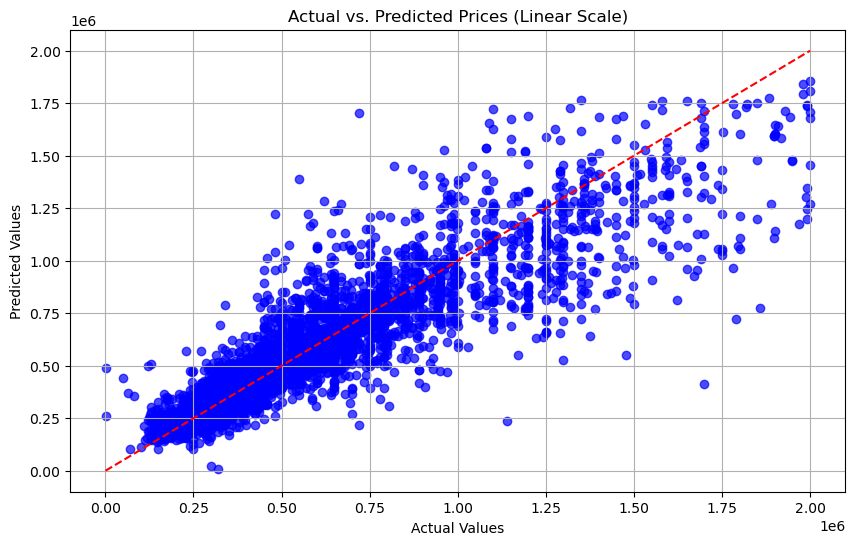

In [129]:
# Create a scatter plot of actual vs. predicted values on original scale
plt.figure(figsize=(10, 6))
plt.scatter(actual_values_linear, predicted_values_linear, color='blue', alpha=0.7)
plt.plot([min(actual_values_linear), max(actual_values_linear)], [min(actual_values_linear), max(actual_values_linear)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Prices (Linear Scale)')
plt.grid(True)
plt.show()